### Exploratory Data Analysis

EDA on IMDB dataset
21 march 2023, tisdag
Dataset link from kaggle. 
https://www.kaggle.com/datasets/georgescutelnicu/top-100-popular-movies-from-2003-to-2022-imdb

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv('movies.csv')

In [3]:
df.head(5)

,Title,Rating,Year,Month,Certificate,Runtime,Directors,Stars,Genre,Filming_location,Budget,Income,Country_of_origin
0,Avatar: The Way of Water,7.8,2022,December,PG-13,192,James Cameron,"Sam Worthington, Zoe Saldana, Sigourney Weaver...","Action, Adventure, Fantasy",New Zealand,"$350,000,000","$2,267,946,983",United States
1,Guillermo del Toro's Pinocchio,7.6,2022,December,PG,117,"Guillermo del Toro, Mark Gustafson","Ewan McGregor, David Bradley, Gregory Mann, Bu...","Animation, Drama, Family",USA,"$35,000,000","$108,967","United States, Mexico, France"
2,Bullet Train,7.3,2022,August,R,127,David Leitch,"Brad Pitt, Joey King, Aaron Taylor Johnson, Br...","Action, Comedy, Thriller",Japan,"$85,900,000","$239,268,602","Japan, United States"
3,The Banshees of Inisherin,7.8,2022,November,R,114,Martin McDonagh,"Colin Farrell, Brendan Gleeson, Kerry Condon, ...","Comedy, Drama",Ireland,Unknown,"$19,720,823","Ireland, United Kingdom, United States"
4,M3gan,6.4,2022,December,PG-13,102,Gerard Johnstone,"Jenna Davis, Amie Donald, Allison Williams, Vi...","Horror, Sci-Fi, Thriller",New Zealand,"$12,000,000","$171,253,910",United States


In [4]:
df.describe()

,Rating,Year
count,1999.000000,2000.000000
mean,6.661631,2012.500000
std,0.911507,5.767723
min,1.900000,2003.000000
25%,6.100000,2007.750000
50%,6.700000,2012.500000
75%,7.300000,2017.250000
max,9.000000,2022.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Title              2000 non-null   object 
 1   Rating             1999 non-null   float64
 2   Year               2000 non-null   int64  
 3   Month              2000 non-null   object 
 4   Certificate        1966 non-null   object 
 5   Runtime            2000 non-null   object 
 6   Directors          2000 non-null   object 
 7   Stars              2000 non-null   object 
 8   Genre              2000 non-null   object 
 9   Filming_location   2000 non-null   object 
 10  Budget             2000 non-null   object 
 11  Income             2000 non-null   object 
 12  Country_of_origin  2000 non-null   object 
dtypes: float64(1), int64(1), object(11)
memory usage: 203.2+ KB


In [6]:
df.shape

(2000, 13)

In [7]:
df.isna().sum()

Title                 0
Rating                1
Year                  0
Month                 0
Certificate          34
Runtime               0
Directors             0
Stars                 0
Genre                 0
Filming_location      0
Budget                0
Income                0
Country_of_origin     0
dtype: int64

In [8]:
# There is a movie without rating! Lets find out
movie_wo_rating = df[df['Rating'].isna()]['Title']
print(f' Movie without rating: {movie_wo_rating}')

 Movie without rating: 85    A Man Called Otto
Name: Title, dtype: object


In [9]:
# Drop all na values from 'rating'
df.dropna(subset=['Rating'], inplace=True)

In [10]:
print(f'Current number of rows: {df.shape[0]}')
print(f'Current number of columns: {df.shape[1]}')

Current number of rows: 1999
Current number of columns: 13


In [11]:
#check if the column is gone
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1999 entries, 0 to 1999
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Title              1999 non-null   object 
 1   Rating             1999 non-null   float64
 2   Year               1999 non-null   int64  
 3   Month              1999 non-null   object 
 4   Certificate        1965 non-null   object 
 5   Runtime            1999 non-null   object 
 6   Directors          1999 non-null   object 
 7   Stars              1999 non-null   object 
 8   Genre              1999 non-null   object 
 9   Filming_location   1999 non-null   object 
 10  Budget             1999 non-null   object 
 11  Income             1999 non-null   object 
 12  Country_of_origin  1999 non-null   object 
dtypes: float64(1), int64(1), object(11)
memory usage: 218.6+ KB


In [12]:
df= df.drop(['Certificate'], axis=1)

In [13]:
print(f'Current number of rows: {df.shape[0]}')
print(f'Current number of columns: {df.shape[1]}')

Current number of rows: 1999
Current number of columns: 12


In [14]:
#to check number of null values for each column
df.isnull().sum()

Title                0
Rating               0
Year                 0
Month                0
Runtime              0
Directors            0
Stars                0
Genre                0
Filming_location     0
Budget               0
Income               0
Country_of_origin    0
dtype: int64

In [15]:
#This did not work out well // Excluded Ratings column due to dropna()
columns = df.loc[:, df.notna().all()]

for column_header in columns:
    print(column_header)

Title
Rating
Year
Month
Runtime
Directors
Stars
Genre
Filming_location
Budget
Income
Country_of_origin


In [16]:
#Double checking on different code with rows are 'Unknown'


df1 = df[(df['Budget']=='Unknown')]
df1 = df[(df['Income']=='Unknown')]

df1.any().sum()      

12

In [17]:
# There we actuallly see that Unknown were not dropped previously.
df1.isna().any().sum()

0

In [18]:
df.head(2)

,Title,Rating,Year,Month,Runtime,Directors,Stars,Genre,Filming_location,Budget,Income,Country_of_origin
0,Avatar: The Way of Water,7.8,2022,December,192,James Cameron,"Sam Worthington, Zoe Saldana, Sigourney Weaver...","Action, Adventure, Fantasy",New Zealand,"$350,000,000","$2,267,946,983",United States
1,Guillermo del Toro's Pinocchio,7.6,2022,December,117,"Guillermo del Toro, Mark Gustafson","Ewan McGregor, David Bradley, Gregory Mann, Bu...","Animation, Drama, Family",USA,"$35,000,000","$108,967","United States, Mexico, France"


### Getting rid of currency symbols

#Change data type of the those 2 columns to integer
df['income'] = df1['Income'].astype(int)
df['budget'] = df1['Budget'].astype(int)
    
    
ValueError: invalid literal for int() with base 10: '$2,267,946,983 ' 
So need to get rid of currecncy symbols first. then operate with features in df.

In [ ]:
#df2['Budget'] = df2['Budget'].str.replace(',', '')
#df2['Budget'] = df2['Budget'].str.replace('$', '')
#df2['Income'] = df2['Income'].str.replace('$', '')
#df2['Income'] = df2['Income'].str.replace(',', '')
#df2['Income'] = df2['Income'].str.replace('Unknown', '0')
#df2['Budget'] = df2['Budget'].str.replace('Unknown', '0')


# Convert multiple columns to float type data
df1 = df1.astype({'Budget':'float','Income':'float'})


df2['Budget'] = df2['Budget'].astype(float)
df2['Income'] = df2['Income'].astype(float)
print(df.dtypes)

Same error msg pops up

In [19]:
# Conversion function (converts currency and to float)
def convert_to_usd(amount):
    amount.replace(' ', '')
    amount.replace('\xa0', '')
    if amount.startswith('$'):
        amount = amount.strip('$').replace(',', '')   # must remove commas
        return float(amount)   # convert str into float
    elif amount.startswith('€'):
        # Exchange rate for EUR to USD
        amount = amount.strip('€').replace(',', '')
        return float(amount) * 1.06 
    elif amount.startswith('¥'):
        # Exchange rate for YEN to USD
        amount = amount.strip('¥').replace(',', '')
        return float(amount) * 0.0075
    elif amount.startswith('₹'):
        # Exchange rate for RPL to USD
        amount = amount.strip('₹').replace(',', '')
        return float(amount) * 0.012 
    elif amount.startswith('SEK'):
        # Exchange rate for SEK to USD
        amount = amount.strip('SEK').replace(',', '')
        return float(amount) * 0.094
    elif amount.startswith('DKK'):
        # Exchange rate for RPL to USD
        amount = amount.strip('DKK').replace(',', '')
        return float(amount) * 0.14
    elif amount.startswith('£'):
        # Exchange rate for RPL to USD
        amount = amount.strip('£').replace(',', '')
        return float(amount) * 1.21  
    else:
        return None

In [20]:
#Applying the conversion function
df['Budget'] = df['Budget'].apply(convert_to_usd)
df['Income'] = df['Income'].apply(convert_to_usd)

In [21]:
df = df.astype({'Budget':'float','Income':'float'})

In [22]:
df1.head()

,Title,Rating,Year,Month,Runtime,Directors,Stars,Genre,Filming_location,Budget,Income,Country_of_origin
5,Emancipation,6.1,2022,December,132,Antoine Fuqua,"Will Smith, Ben Foster, Charmaine Bingwa, Gilb...","Action, Thriller",Unknown,"$120,000,000",Unknown,United States
15,Spirited,6.6,2022,November,127,Sean Anders,"Will Ferrell, Ryan Reynolds, Octavia Spencer, ...","Comedy, Family, Musical",USA,"$100,000,000",Unknown,United States
16,Lady Chatterley's Lover,6.7,2022,December,126,Laure de Clermont Tonnerre,"Emma Corrin, Jack O Connell, Matthew Duckett, ...","Drama, Romance",UK,Unknown,Unknown,"United Kingdom, United States"
17,A Christmas Story Christmas,6.8,2022,November,98,Clay Kaytis,"Peter Billingsley, Erinn Hayes, River Drosche,...","Comedy, Family",USA,Unknown,Unknown,"United States, Mexico, Hungary, Canada"
18,Troll,5.8,2022,December,101,Roar Uthaug,"Ine Marie Wilmann, Kim Falck, Mads Sj g rd Pet...","Action, Adventure, Drama",Norway,Unknown,Unknown,Norway


In [ ]:
df.info()

In [23]:
# Find out those with 'Unknowns' got undetected.
df_income_na = (df1['Income'] == 'Unknown').sum()
df_budget_na = (df1['Budget'] == 'Unknown').sum()


In [24]:
print(df_income_na)
print(df_budget_na)

144
99


In [25]:
# Convert the 'Unknown' values to NaN __Gpt
df1['Income'] = pd.to_numeric(df1['Income'], errors='coerce')
df1['Budget'] = pd.to_numeric(df1['Budget'], errors='coerce')

In [27]:
income_mean= df['Income'].mean()   
budget_mean= df['Budget'].mean()

print(income_mean)
print(budget_mean)

188720624.70781672
61466373.15900949


In [28]:
# Fill the missing values with the means
df1['Income'].fillna(income_mean, inplace=True)
df1['Budget'].fillna(budget_mean, inplace=True)

In [29]:
# Count the number of missing values in each variable
df_income_na = df1['Income'].isna().sum()
df_budget_na = df1['Budget'].isna().sum()

In [30]:
print(df_income_na)
print(df_budget_na)

0
0


In [31]:
df.head(3)

,Title,Rating,Year,Month,Runtime,Directors,Stars,Genre,Filming_location,Budget,Income,Country_of_origin
0,Avatar: The Way of Water,7.8,2022,December,192,James Cameron,"Sam Worthington, Zoe Saldana, Sigourney Weaver...","Action, Adventure, Fantasy",New Zealand,350000000.0,2.267947e+09,United States
1,Guillermo del Toro's Pinocchio,7.6,2022,December,117,"Guillermo del Toro, Mark Gustafson","Ewan McGregor, David Bradley, Gregory Mann, Bu...","Animation, Drama, Family",USA,35000000.0,1.089670e+05,"United States, Mexico, France"
2,Bullet Train,7.3,2022,August,127,David Leitch,"Brad Pitt, Joey King, Aaron Taylor Johnson, Br...","Action, Comedy, Thriller",Japan,85900000.0,2.392686e+08,"Japan, United States"


In [32]:
# Convert values of (e) to regular 6 or 7 digit numbers and round them for Income, Budget columns
def process_data(df):
    
    df['Income'] = df['Income'].apply(lambda x: round(x * 1e-2, 7))
    
    return df

In [33]:
processed_df = process_data(df)

In [34]:
processed_df.head(3)

,Title,Rating,Year,Month,Runtime,Directors,Stars,Genre,Filming_location,Budget,Income,Country_of_origin
0,Avatar: The Way of Water,7.8,2022,December,192,James Cameron,"Sam Worthington, Zoe Saldana, Sigourney Weaver...","Action, Adventure, Fantasy",New Zealand,350000000.0,22679469.83,United States
1,Guillermo del Toro's Pinocchio,7.6,2022,December,117,"Guillermo del Toro, Mark Gustafson","Ewan McGregor, David Bradley, Gregory Mann, Bu...","Animation, Drama, Family",USA,35000000.0,1089.67,"United States, Mexico, France"
2,Bullet Train,7.3,2022,August,127,David Leitch,"Brad Pitt, Joey King, Aaron Taylor Johnson, Br...","Action, Comedy, Thriller",Japan,85900000.0,2392686.02,"Japan, United States"


In [44]:
df_NaN_rows= (processed_df['Income']=='NaN').sum()

print(df_NaN_rows)

0


In [45]:
# Why do I still find these NaN values ?!
processed_df['Income'].sort_values()

396      3.05
101      7.03
1203    15.41
1176    18.08
1366    34.92
        ...  
1516      NaN
1549      NaN
1550      NaN
1742      NaN
1979      NaN
Name: Income, Length: 1999, dtype: float64

In [46]:
processed_df.describe()

,Rating,Year,Budget,Income
count,1999.000000,1999.000000,1.686000e+03,1.855000e+03
mean,6.661631,2012.495248,6.146637e+07,1.887206e+06
std,0.911507,5.765249,6.078953e+07,2.774062e+06
min,1.900000,2003.000000,1.000000e+01,3.050000e+00
25%,6.100000,2007.500000,1.700000e+07,2.491581e+05
50%,6.700000,2012.000000,4.000000e+07,9.084265e+05
75%,7.300000,2017.000000,8.500000e+07,2.204566e+06
max,9.000000,2022.000000,3.560000e+08,2.922918e+07


### exponenential value (e)

##### The value "2.267947e+09" is in scientific notation, aka"exponential notation". It represents a floating-point number in a compact way, where the "e" indicates the power of 10 to which the number should be multiplied. In this case, "e+09" means that the number should be multiplied by 10 to the power of 9, which is equivalent to 1 followed by 9 zeros, or 1,000,000,000.

value = 2.267947e+09
value = round(value * 1e-2, 7)  # multiply by 1 billion and round to 7 digits
print(value)  # output: 22679470.0

In [ ]:
processed_df['Budget'] = processed_df['Budget'].astype(int)
processed_df['Income'] = processed_df['Income'].astype(int)

In [49]:
processed_df['Budget'].sort_values()

print(f'Current number of rows: {df.shape[0]}')
print(f'Current number of columns: {df.shape[1]}')

Current number of rows: 1999
Current number of columns: 12


### Now we have df and df_processed values // I am gonna visualise for both to compare and check for inconsistencies if any. 

In [ ]:
df.describe()

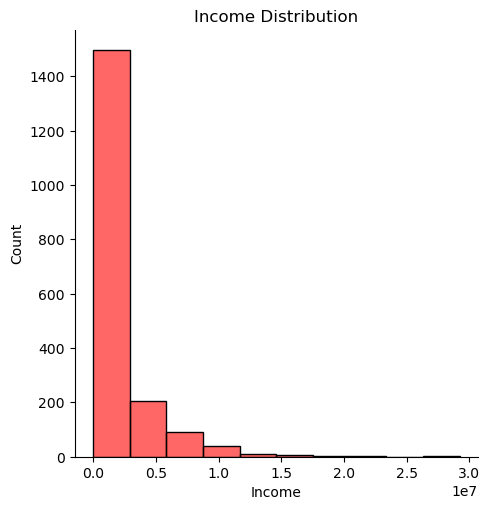

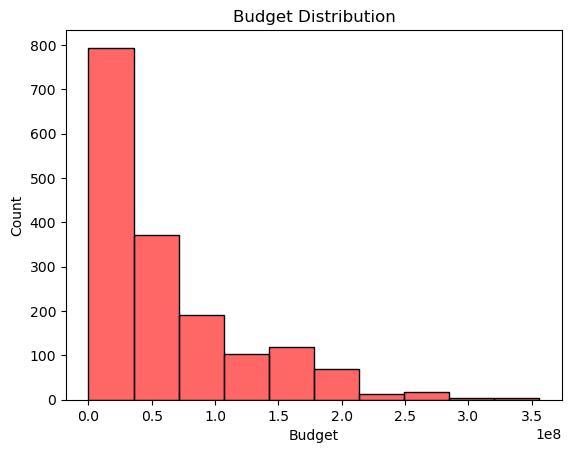

In [66]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the distribution of income
sns.displot(x=df['Income'], bins= 10, color='red', alpha= 0.6)
plt.title('Income Distribution')
plt.xlabel('Income')
plt.ylabel('Count')
plt.show()

# Plot the distribution of budget
sns.histplot(x= df['Budget'], bins=10, color='red', alpha= 0.6)
plt.title('Budget Distribution')
plt.xlabel('Budget')
plt.ylabel('Count')
plt.show()


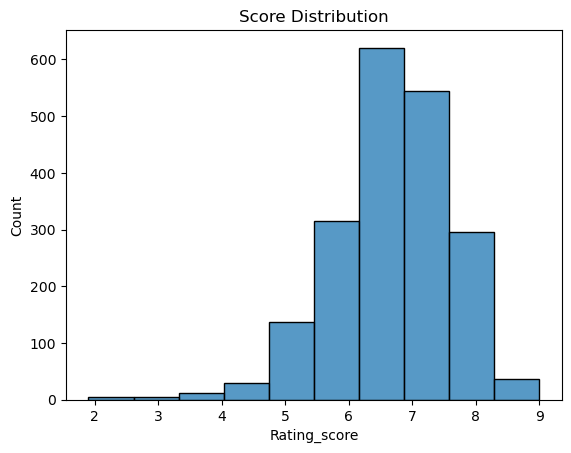

In [51]:
# Plot the distribution of rating
sns.histplot(x= df['Rating'], bins=10, color='yellow', alpha= 0.9)
plt.title('Score Distribution')
plt.xlabel('Rating_score')
plt.ylabel('Count')
plt.show()

df['Budget'] = df['Budget'].astype(int)
df['Income'] = df['Income'].astype(int)

In [55]:
#profit = income - budget 

# define a function to calculate the values for the new column
def calc_profit(row):
    return row['Budget'] - row['Income']

# apply the function to each row using the apply() method
df['Profit'] = df.apply(calc_profit, axis=1)
df.head()

,Rating,Income,Budget,Year,Profit
0,7.8,22679469.83,350000000.0,2022,3.273205e+08
1,7.6,1089.67,35000000.0,2022,3.499891e+07
2,7.3,2392686.02,85900000.0,2022,8.350731e+07
3,7.8,197208.23,NaN,2022,NaN
4,6.4,1712539.10,12000000.0,2022,1.028746e+07


In [56]:
import seaborn as sns
import matplotlib.pyplot as plt

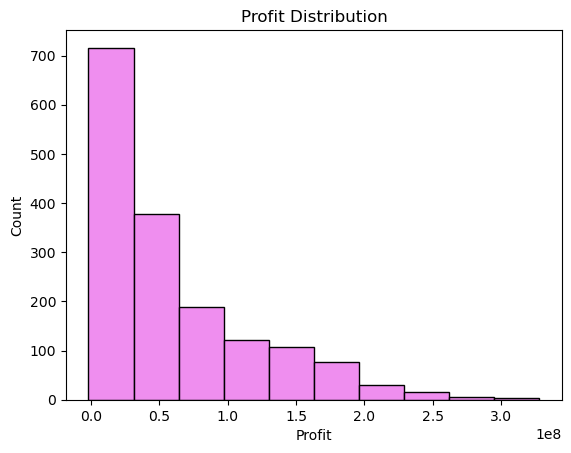

In [59]:
# Plot the distribution of budget
# need a better visuals (ece)

sns.histplot(x= df['Profit'], bins=10, color='violet', alpha= 0.9)
plt.title('Profit Distribution')
plt.xlabel('Profit')
plt.ylabel('Count')
plt.show()

In [62]:
import matplotlib as mpl
import matplotlib.pyplot as plt

In [ ]:
##Another plot with multiple features
## Due to Nan values scatter plot gives error. 
df.plot(kind='scatter', x= df['Budget'], y= df['Income'], s= df['Profit'], cmap=plt.get_cmap("jet"), figsize=(10,6), 
        c= df['Rating'], colorbar=True, sharex=False)

plt.title('Budget, Income, Profit  and Ratings')
plt.legend()
plt.show()

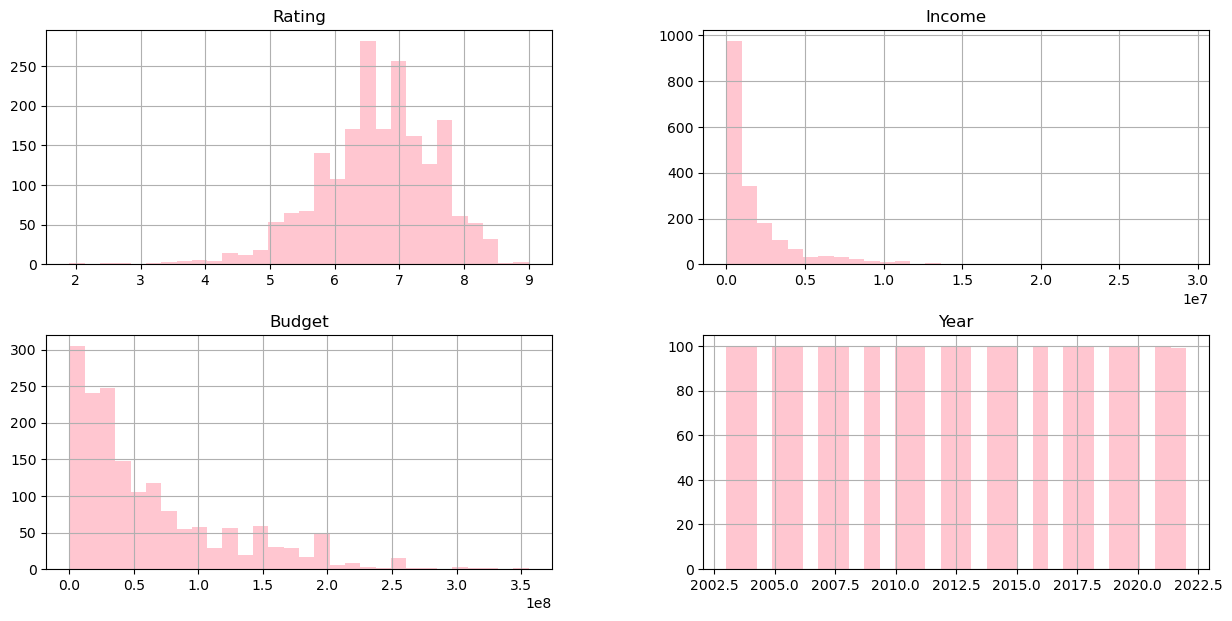

In [67]:
df = df[["Rating", "Income", "Budget", "Year"]]
df.hist(bins=30, figsize=(15,7), color='pink', alpha= 0.9)

plt.show()

processed_df still contains 'NaN' values, which annoys me. 

In [ ]:
# when working with levels /categorical data, these below will come handy
from sklearn.preprocessing import LabelEncoder

In [ ]:
from sklearn.preprocessing import OneHotEncoder
import pandas.getdummies